#主成分分析(PCA: Principal Component Analysis)
Author: Yoshimasa Ogawa  
LastModified: 2015-12-19  

圓川隆夫『多変量のデータ解析』(1988年, 朝倉書店)第4章「主成分分析と正準相関分析」をPythonで実行します。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# データの読み込み
data = pd.read_csv("data/tab47.csv")
labels = [u'国語', u'社会', u'数学', u'理科', u'音楽', u'美術', u'保体', u'技家', u'英語']
data.head()

,国語,社会,数学,理科,音楽,美術,保体,技家,英語
0,55,59,38,66,29,32,29,36,61
1,36,49,35,57,63,62,55,66,45
2,53,58,16,41,67,64,50,50,48
3,78,80,42,65,85,75,69,76,70
4,6,19,38,59,49,47,43,57,26


In [3]:
# 主成分分析
pca = PCA(5)
result = pca.fit(data)

In [4]:
# 寄与率と累積寄与率
pd.DataFrame(np.round([result.explained_variance_ratio_, np.cumsum(result.explained_variance_ratio_)], 3), index=["寄与率", "累積寄与率"])

,0,1,2,3,4
寄与率,0.529,0.285,0.169,0.006,0.004
累積寄与率,0.529,0.814,0.983,0.990,0.994


In [5]:
# 固有ベクトル(主成分軸の係数)
weight = result.components_.T
pd.DataFrame(weight, index=labels)

,0,1,2,3,4
国語,-0.463553,-0.265949,0.433919,0.281457,-0.649347
社会,-0.463749,-0.210552,0.276771,-0.041114,0.579257
数学,-0.377548,0.065519,-0.593102,0.612361,0.114103
理科,-0.343385,-0.037301,-0.460187,-0.272067,-0.159203
音楽,-0.139303,0.549883,0.244533,0.313006,0.219472
美術,-0.116533,0.391324,0.252040,0.102468,-0.043249
保体,-0.149104,0.421141,0.121070,-0.244846,0.054885
技家,-0.250084,0.452668,-0.179654,-0.382967,-0.327357
英語,-0.437995,-0.203666,0.036280,-0.393699,0.210312


In [6]:
# 主成分スコア
score = np.round(result.fit_transform(data), 4)
pd.DataFrame(score)

,0,1,2,3,4
0,12.9065,-58.0407,-5.8808,-3.0650,-0.6548
1,17.9710,7.4812,2.0810,-5.2296,1.3867
2,21.2271,-6.5602,34.4407,-0.4691,2.3260
3,-41.3821,12.4601,30.5140,-1.4547,-1.3851
4,60.0309,3.0719,-29.6687,-3.2009,-0.6189
5,3.0987,21.4562,-7.1644,-0.7835,-4.5092
6,-39.2399,-15.8669,4.3747,1.2457,-0.8471
7,39.4415,15.7569,-13.6215,-0.9255,-2.4541
8,19.3620,-14.6117,21.4199,-3.9563,2.1186
9,-23.6717,-5.5149,0.7144,6.2791,2.4907


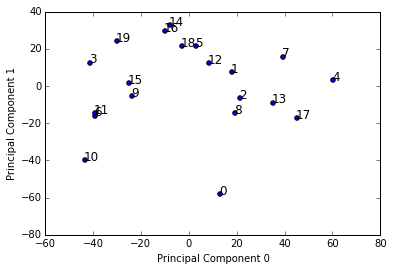

In [7]:
# 主成分スコアの配置
x = 0
y = 1
plt.scatter(score.T[x], score.T[y])
for i in range(len(data)):
    plt.text(score.T[x][i], score.T[y][i], str(i), fontsize=12)
plt.xlabel('Principal Component %s' % x)
plt.ylabel('Principal Component %s' % y)